# COMS 3007: Machine Learning Assignment 2019 

__Students Contributing__

Simbarashe Mhlanga 1325952

Alec Mbangu

Karabo

Rifumo










































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































Ref of the dataset UCI Machine Learning Repository 
Dataset Name: Adult
Data Source:https://archive.ics.uci.edu/ml/datasets/Adult
#Abstract: Predict whether income exceeds $50K/yr based on census data. Also known as "Census Income" dataset.

__Import all that will be necessary__

In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline

# 1. Data collection
__Downloading the data__

In [2]:
'''
There are some whitespaces before and after the data values.
To trim all the whitespaces we can use the separator ‘ *, *’.
The test dataset has a weird first line, hence we skip the line using skiprows=1.
The missing values in the dataset are indicated by ?
We will change the ' ?' to nulls
'''

columns = ['Age','Workclass','fnlgwt','Education','Education num','Marital Status',
           'Occupation','Relationship','Race','Sex','Capital Gain','Capital Loss',
           'Hours/Week','Native country','Income']

# Read the online file through github, and assign it to variable "df"
import_source="https://raw.githubusercontent.com/SimbarasheJehol/MachineLearningProject/master/adult.csv"
import_source_test="https://raw.githubusercontent.com/SimbarasheJehol/MachineLearningProject/master/adult.test"
train = pd.read_csv(import_source, names = columns , na_values=' ?')
test =  pd.read_csv(import_source_test, names = columns, skiprows=1, na_values=' ?')


In [3]:

train.head()


,Age,Workclass,fnlgwt,Education,Education num,Marital Status,Occupation,Relationship,Race,Sex,Capital Gain,Capital Loss,Hours/Week,Native country,Income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [4]:

train.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
Age               32561 non-null int64
Workclass         30725 non-null object
fnlgwt            32561 non-null int64
Education         32561 non-null object
Education num     32561 non-null int64
Marital Status    32561 non-null object
Occupation        30718 non-null object
Relationship      32561 non-null object
Race              32561 non-null object
Sex               32561 non-null object
Capital Gain      32561 non-null int64
Capital Loss      32561 non-null int64
Hours/Week        32561 non-null int64
Native country    31978 non-null object
Income            32561 non-null object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [5]:

train.isnull().sum()


Age                  0
Workclass         1836
fnlgwt               0
Education            0
Education num        0
Marital Status       0
Occupation        1843
Relationship         0
Race                 0
Sex                  0
Capital Gain         0
Capital Loss         0
Hours/Week           0
Native country     583
Income               0
dtype: int64

As we can see, the data contains nulls, we'll deal with these under Feature Engineering


# Features engineering

## Income
__We will simply change Income into 0's and 1's__

In [161]:
import re

In [6]:

train['Income'] = train['Income'].apply(lambda x: 1 if x == ' >50K' else 0)
test['Income'] = test['Income'].apply(lambda x: 1 if x == ' >50K.' else 0)


In [7]:

train.Income.value_counts()


0    24720
1     7841
Name: Income, dtype: int64

## Age

In [8]:

train.Age.describe()


count    32561.000000
mean        38.581647
std         13.640433
min         17.000000
25%         28.000000
50%         37.000000
75%         48.000000
max         90.000000
Name: Age, dtype: float64

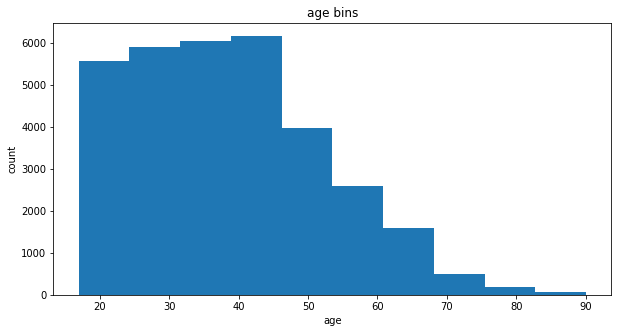

In [9]:

# draw the histogram for age
train['Age'].plot(kind='hist', figsize=(10, 5))


# set x/y labels and plot title
plt.xlabel("age")
plt.ylabel("count")
plt.title("age bins")
plt.show()


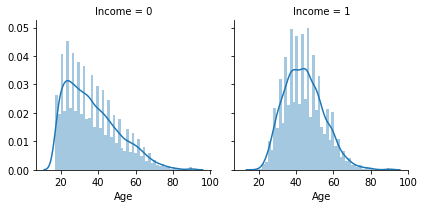

In [10]:

g = sns.FacetGrid(train, col='Income')
g = g.map(sns.distplot, "Age")
plt.show()


Age looks skewed, it needs to be normalized.

## Workclass

In [11]:

train.Workclass.value_counts()


 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 State-gov            1298
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: Workclass, dtype: int64

In [12]:

train.Workclass.isnull().sum()


1836

__There are many empty rows (1836), let's replace them with nan and check how data plot looks like.__

In [13]:

train['Workclass'].fillna(' nan', inplace=True)
test['Workclass'].fillna(' nan', inplace=True)


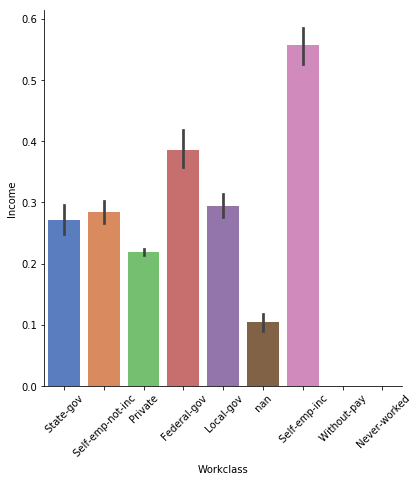

In [14]:

g = sns.catplot(x="Workclass", y="Income", data=train, kind="bar", height = 6, palette = "muted")
# g = g.set_ylabels("Income >50K Probability")
plt.xticks(rotation=45);
plt.show()


In [15]:

train.Workclass.value_counts()


 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 nan                  1836
 State-gov            1298
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: Workclass, dtype: int64

We merge Never-worked and Without-pay since they  look very similar

In [16]:

train['Workclass'].replace(' Without-pay', ' Never-worked', inplace=True)


In [17]:

train.Workclass.unique()


array([' State-gov', ' Self-emp-not-inc', ' Private', ' Federal-gov',
       ' Local-gov', ' nan', ' Self-emp-inc', ' Never-worked'],
      dtype=object)

## fnlgwt

In [18]:

train['fnlgwt'].describe()


count    3.256100e+04
mean     1.897784e+05
std      1.055500e+05
min      1.228500e+04
25%      1.178270e+05
50%      1.783560e+05
75%      2.370510e+05
max      1.484705e+06
Name: fnlgwt, dtype: float64

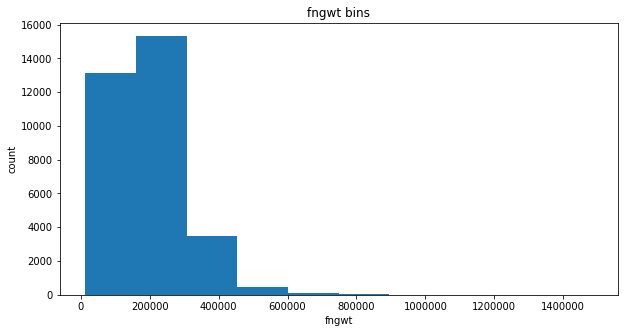

In [19]:

# draw the histogram for age
train['fnlgwt'].plot(kind='hist', figsize=(10, 5))


# set x/y labels and plot title
plt.xlabel("fngwt")
plt.ylabel("count")
plt.title("fngwt bins")
plt.show()


Fnlgwt feature has high numers and big sandard deviation, let's take logarithm of that.

In [20]:

train['fnlgwt'] = train['fnlgwt'].apply(lambda x: np.log1p(x))
test['fnlgwt'] = train['fnlgwt'].apply(lambda x: np.log1p(x))


In [21]:

train['fnlgwt'].describe()


count    32561.000000
mean        11.983778
std          0.630738
min          9.416216
25%         11.676981
50%         12.091542
75%         12.376035
max         14.210727
Name: fnlgwt, dtype: float64

## Education

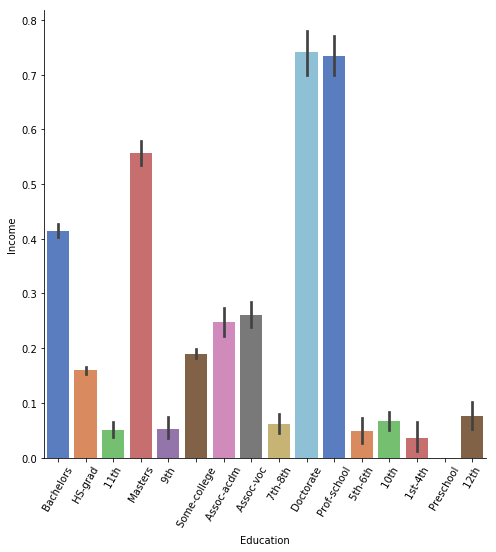

In [22]:

sns.catplot(x = "Education", y = "Income", data = train, kind = "bar", height = 7, palette = "muted")
plt.xticks(rotation=60);
plt.show()


Primary education is devided into grades, they all give almost the same result. We can merge them into one feature - Primary.

In [23]:

def primary(x):
    if x in [' 1st-4th', ' 5th-6th', ' 7th-8th', ' 9th', ' 10th', ' 11th', ' 12th']:
        return ' Primary'
    else:
        return x
    

In [24]:

train['Education'] = train['Education'].apply(primary)
test['Education'] = test['Education'].apply(primary)


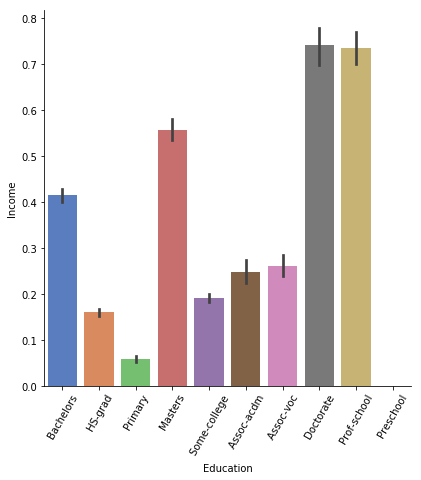

In [25]:

sns.catplot(x="Education",y="Income",data=train,kind="bar", height = 6, palette = "muted")
plt.xticks(rotation=60);


## Education num

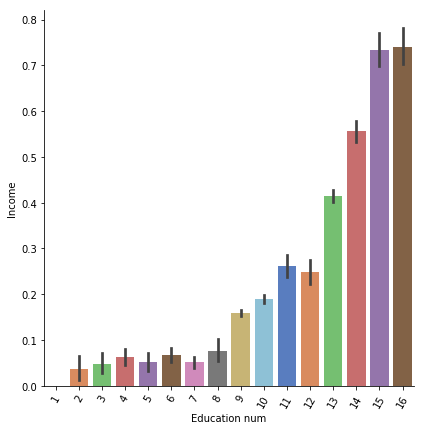

In [26]:

sns.catplot(x = "Education num", y="Income", data = train, kind = "bar", height = 6, palette = "muted")
plt.xticks(rotation=60);


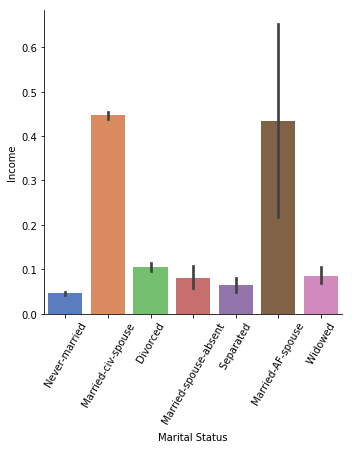

In [27]:

sns.catplot(x="Marital Status",y="Income",data=train,kind="bar", height = 5, palette = "muted")
plt.xticks(rotation=60);


## Marital Status

In [28]:

train['Marital Status'].value_counts()


 Married-civ-spouse       14976
 Never-married            10683
 Divorced                  4443
 Separated                 1025
 Widowed                    993
 Married-spouse-absent      418
 Married-AF-spouse           23
Name: Marital Status, dtype: int64

There are very few Married-AF-spouse features. They are similar to Married-civ-spouse, so we can merge them.

In [29]:

train['Marital Status'].replace(' Married-AF-spouse', ' Married-civ-spouse', inplace=True)
test['Marital Status'].replace(' Married-AF-spouse', ' Married-civ-spouse', inplace=True)


In [30]:

train['Marital Status'].value_counts()


 Married-civ-spouse       14999
 Never-married            10683
 Divorced                  4443
 Separated                 1025
 Widowed                    993
 Married-spouse-absent      418
Name: Marital Status, dtype: int64

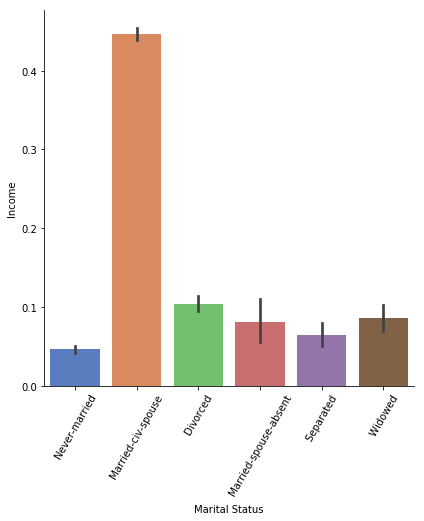

In [31]:

sns.catplot(x = "Marital Status",y = "Income", data = train, kind = "bar", height = 6, palette = "muted")
plt.xticks(rotation=60);



## Occupation


In [32]:

train['Occupation'].fillna(' 0', inplace=True)
test['Occupation'].fillna(' 0', inplace=True)


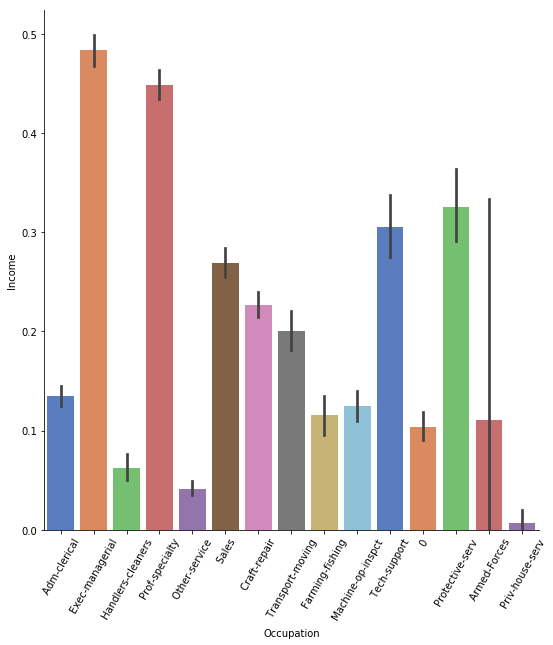

In [33]:

sns.catplot(x = "Occupation", y = "Income", data = train, kind = "bar", height = 8, palette = "muted")
plt.xticks(rotation=60);


In [34]:

train['Occupation'].value_counts()


 Prof-specialty       4140
 Craft-repair         4099
 Exec-managerial      4066
 Adm-clerical         3770
 Sales                3650
 Other-service        3295
 Machine-op-inspct    2002
 0                    1843
 Transport-moving     1597
 Handlers-cleaners    1370
 Farming-fishing       994
 Tech-support          928
 Protective-serv       649
 Priv-house-serv       149
 Armed-Forces            9
Name: Occupation, dtype: int64

Everything looks good, except Armed-Forces. They are similar to 0 and that's what we replace them with.

In [35]:

train['Occupation'].replace(' Armed-Forces', ' 0', inplace=True)
test['Occupation'].replace(' Armed-Forces', ' 0', inplace=True)


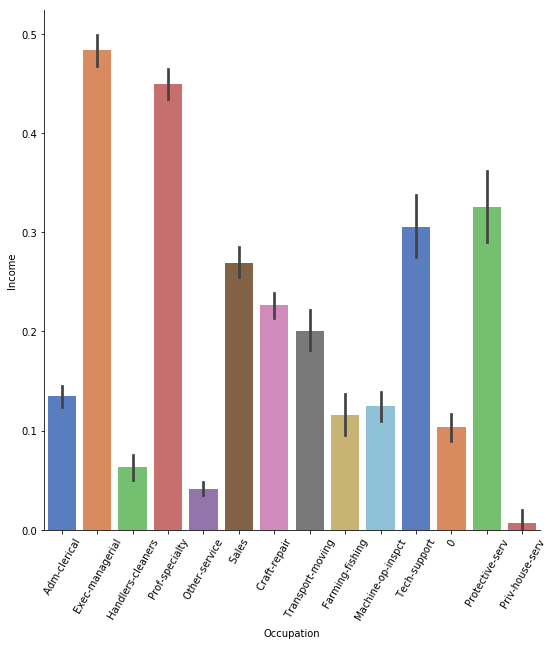

In [36]:

sns.catplot(x="Occupation",y="Income",data=train,kind="bar", height = 8, palette = "muted")
plt.xticks(rotation=60);


## Relationship 

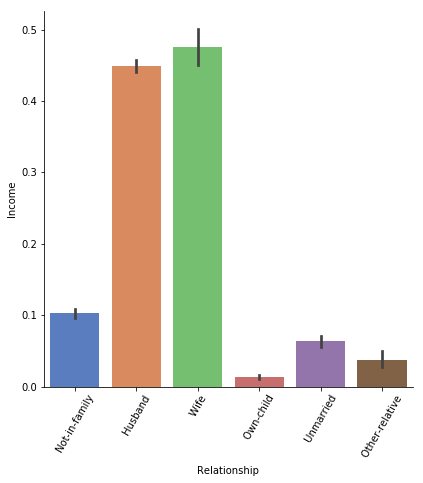

In [37]:

sns.catplot(x="Relationship",y="Income",data=train,kind="bar", height = 6, palette = "muted")
plt.xticks(rotation=60);


In [38]:

train['Relationship'].value_counts()


 Husband           13193
 Not-in-family      8305
 Own-child          5068
 Unmarried          3446
 Wife               1568
 Other-relative      981
Name: Relationship, dtype: int64

Looks good.

## Race

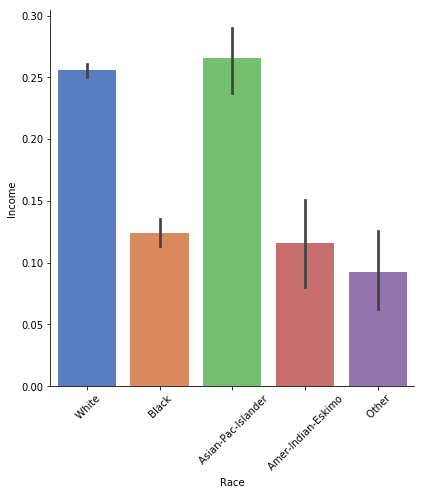

In [39]:

sns.catplot(x="Race", y = "Income",data=train,kind="bar", height = 6, palette = "muted")
plt.xticks(rotation=45);


In [40]:

train['Race'].value_counts()


 White                 27816
 Black                  3124
 Asian-Pac-Islander     1039
 Amer-Indian-Eskimo      311
 Other                   271
Name: Race, dtype: int64

Nothing to change.

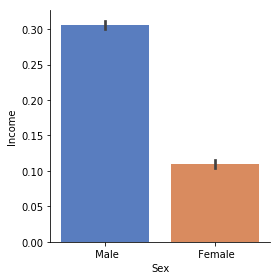

In [41]:


sns.catplot(x="Sex",y="Income",data=train,kind="bar", height = 4, palette = "muted");





Nothing to change.



## Capital Gain , Capital Loss, Hours/Week

These features just need to be standarized.


## Native Country

In [42]:

train['Native country'].fillna(' 0', inplace=True)
test['Native country'].fillna(' 0', inplace=True)


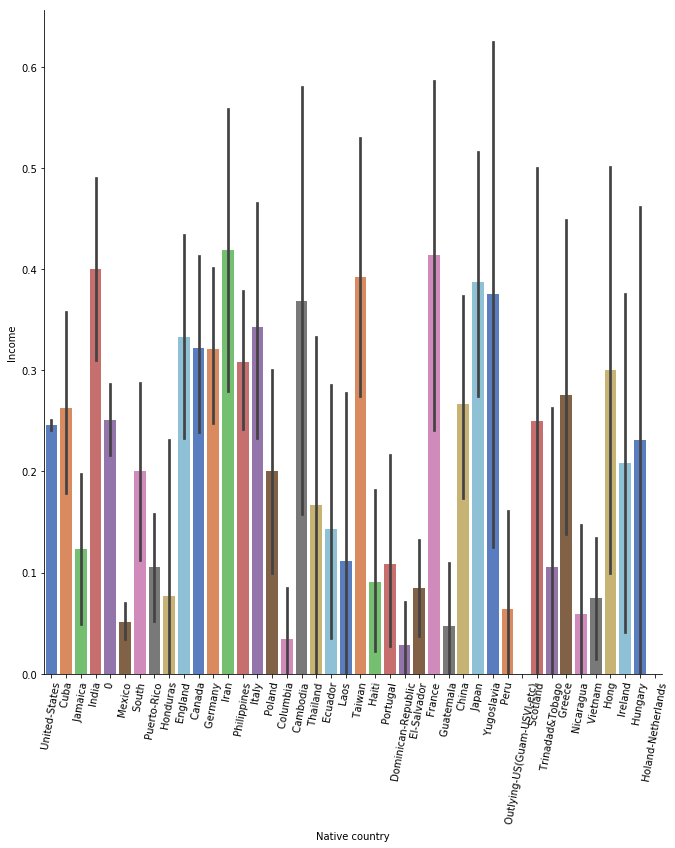

In [43]:

sns.catplot(x="Native country",y="Income",data=train,kind="bar", height = 10, palette = "muted")
plt.xticks(rotation=80);


We need to segregate these countries into a few categories.

In [44]:

def native(country):
    if country in [' United-States', ' Cuba', ' 0']:
        return 'US'
    elif country in [' England', ' Germany', ' Canada', ' Italy', ' France', ' Greece', ' Philippines']:
        return 'Western'
    elif country in [' Mexico', ' Puerto-Rico', ' Honduras', ' Jamaica', ' Columbia', ' Laos', ' Portugal', ' Haiti',
                     ' Dominican-Republic', ' El-Salvador', ' Guatemala', ' Peru', 
                     ' Trinadad&Tobago', ' Outlying-US(Guam-USVI-etc)', ' Nicaragua', ' Vietnam', ' Holand-Netherlands' ]:
        return 'Poor' # no offence
    elif country in [' India', ' Iran', ' Cambodia', ' Taiwan', ' Japan', ' Yugoslavia', ' China', ' Hong']:
        return 'Eastern'
    elif country in [' South', ' Poland', ' Ireland', ' Hungary', ' Scotland', ' Thailand', ' Ecuador']:
        return 'Poland team'
    
    else: 
        return country    
    

In [45]:


train['Native country'] = train['Native country'].apply(native)
test['Native country'] = test['Native country'].apply(native)



In [46]:


train['Native country'].value_counts()



US             29848
Poor            1415
Western          677
Eastern          386
Poland team      235
Name: Native country, dtype: int64

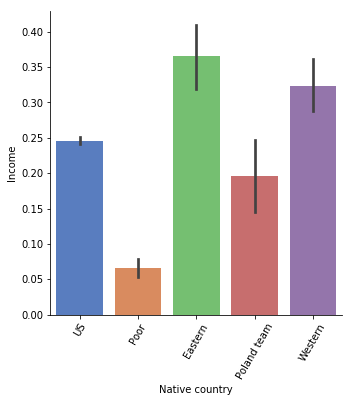

In [47]:


sns.catplot(x="Native country",y="Income",data=train,kind="bar", height = 5, 
palette = "muted")
plt.xticks(rotation=60);





Now we need to encode categorical features, we are going to do it with pd.get_dummies(). As this method may cause some problems, we merge datasets. It ensures that dimensions for both datasets are equal and also that given feature corresponds to the same dimension in both train and test datasets.


# Data exploration

__Combine the dataset__

In [48]:

#merge datasets
joint = pd.concat([train, test], axis=0)


In [49]:

joint.describe()


,Age,fnlgwt,Education num,Capital Gain,Capital Loss,Hours/Week,Income
count,48842.000000,48842.000000,48842.000000,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,8.843380,10.078089,1079.067626,87.502314,40.422382,0.239282
std,13.710510,4.471022,2.570973,7452.019058,403.004552,12.391444,0.426649
min,17.000000,2.385404,1.000000,0.000000,0.000000,1.000000,0.000000
25%,28.000000,2.593762,9.000000,0.000000,0.000000,40.000000,0.000000
50%,37.000000,11.676935,10.000000,0.000000,0.000000,40.000000,0.000000
75%,48.000000,12.211587,12.000000,0.000000,0.000000,45.000000,0.000000
max,90.000000,14.210727,16.000000,99999.000000,4356.000000,99.000000,1.000000


In [50]:

joint.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 48842 entries, 0 to 16280
Data columns (total 15 columns):
Age               48842 non-null int64
Workclass         48842 non-null object
fnlgwt            48842 non-null float64
Education         48842 non-null object
Education num     48842 non-null int64
Marital Status    48842 non-null object
Occupation        48842 non-null object
Relationship      48842 non-null object
Race              48842 non-null object
Sex               48842 non-null object
Capital Gain      48842 non-null int64
Capital Loss      48842 non-null int64
Hours/Week        48842 non-null int64
Native country    48842 non-null object
Income            48842 non-null int64
dtypes: float64(1), int64(6), object(8)
memory usage: 6.0+ MB


In [51]:

joint.dtypes


Age                 int64
Workclass          object
fnlgwt            float64
Education          object
Education num       int64
Marital Status     object
Occupation         object
Relationship       object
Race               object
Sex                object
Capital Gain        int64
Capital Loss        int64
Hours/Week          int64
Native country     object
Income              int64
dtype: object

In [52]:

#list of columns with dtype: object
categorical_features = joint.select_dtypes(include=['object']).axes[1]

for col in categorical_features:
    print (col, joint[col].nunique())
    

Workclass 9
Education 10
Marital Status 6
Occupation 14
Relationship 6
Race 5
Sex 2
Native country 5


In [53]:

#one-hot encode
for col in categorical_features:
    joint = pd.concat([joint, pd.get_dummies(joint[col], prefix=col, prefix_sep=':')], axis=1)
    joint.drop(col, axis=1, inplace=True)


In [54]:

joint.head()


,Age,fnlgwt,Education num,Capital Gain,Capital Loss,Hours/Week,Income,Workclass: Federal-gov,Workclass: Local-gov,Workclass: Never-worked,...,Race: Black,Race: Other,Race: White,Sex: Female,Sex: Male,Native country:Eastern,Native country:Poland team,Native country:Poor,Native country:US,Native country:Western
0,39,11.258253,13,2174,0,40,0,0,0,0,...,0,0,1,0,1,0,0,0,1,0
1,50,11.330348,13,0,0,13,0,0,0,0,...,0,0,1,0,1,0,0,0,1,0
2,38,12.281398,9,0,0,40,0,0,0,0,...,0,0,1,0,1,0,0,0,1,0
3,53,12.366157,7,0,0,40,0,0,0,0,...,1,0,0,0,1,0,0,0,1,0
4,28,12.732013,13,0,0,40,0,0,0,0,...,1,0,0,1,0,0,0,0,1,0




__We separate train,, validation and test datasets.__


In [55]:
import math
size = joint.shape[0]
train = joint.iloc[:math.floor(size*.6)]
validate = joint.iloc[math.floor(size*.6):math.floor(size*.8)]
test = joint.iloc[math.floor(size*.8):]

train.to_csv('lr_train.csv', index=False)
test.to_csv('lr_test.csv', index=False)
validate.to_csv('lr_validate.csv', index=False)

print("training data: \t\t", train.shape[0]/size)
print("validation data:\t", validate.shape[0]/size)
print("test data: \t\t", test.shape[0]/size)


training data: 		 0.5999959051635887
validation data:	 0.19999181032717742
test data: 		 0.20001228450923386


In [56]:

Xtrain = train.drop('Income', axis=1)
Ytrain = train['Income']

Xvalidate = validate.drop('Income', axis=1)
Yvalidate = validate['Income']

Xtest = test.drop('Income', axis=1)
Ytest = test['Income']


In [57]:

# for standardization 

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(Xtrain)
Xtrain = scaler.transform(Xtrain)
Xtest = scaler.transform(Xtest)
Xvalidate = scaler.transform(Xvalidate)


/files1b/1619542/Downloads/tion/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/files1b/1619542/Downloads/tion/lib/python3.7/site-packages/ipykernel_launcher.py:8: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  
/files1b/1619542/Downloads/tion/lib/python3.7/site-packages/ipykernel_launcher.py:9: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  if __name__ == '__main__':
/files1b/1619542/Downloads/tion/lib/python3.7/site-packages/ipykernel_launcher.py:10: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  # Remove the CWD from sys.path while we load stuff.


# LOGISTIC REGRESSION

In [58]:

from math import exp
import math


## Algorithms

### hypothesis()
__It is the function that finds the output__

In [59]:
# hypothesis(): It is the function that finds the output
#     of the hypothesis of the Algorithm,
#     given the theta (list of theta_0, theta_1, theta_2,…,theta_n),
#     feature set X and number of features n.


def hypothesis(theta, X, n):
    h = np.ones((X.shape[0],1))
    theta = theta.reshape(1,n+1)
    for i in range(0,X.shape[0]):
        try:
            ans = exp(-float(np.matmul(theta, X[i])))
        except OverflowError:
            ans = float('inf')
        h[i] = 1 / (1 + ans)
    h = h.reshape(X.shape[0])
    return h


### Gradient Descent Algorithm is implemented

In [60]:

# BGD(): Here, the Gradient Descent Algorithm is implemented.
#     It returns theta (list of theta_0, theta_1, theta_2, …, theta_n)
#     that forms the minima,  theta_history
#     (contains the values of theta for every iteration)
#     and cost (contains the value of cost function at every iteration),
#     given initial theta (list of theta_0, theta_1, theta_2, … , theta_n),
#     alpha (learning rate), num_iters (number of iterations),
#     h (hypothesis value for all samples), Feature Set X,
#     Label Set y and number of features n.
# •   We need to maximise the log likelihood


def BGD(theta, alpha, num_iters,lamb, h, X, y, n):
    theta_history = np.ones((num_iters,n+1))
    cost = np.ones(num_iters)
    for i in range(0,num_iters):
        theta[0] = theta[0] - (alpha/X.shape[0]) * sum(h - y)
        for j in range(1,n+1):
            theta[j]=theta[j]-(alpha/X.shape[0])*(sum((h-y)
                               *X.transpose()[j]) + lamb*theta[j])
        theta_history[i] = theta
        h = hypothesis(theta, X, n)
        cost[i]=(-1/X.shape[0])*(sum(y*np.log(h)+(1-y)*np.log(1 - h))+lamb*sum(theta))
    theta = theta.reshape(1,n+1)
    return theta, theta_history, cost


### Logistic_regression

In [61]:

# Logistic_regression(): It is the main function that takes
#     the Feature Set X, Label Set y, learning rate alpha 
#     and number of iterations (num_iters). 
#     Want to learn function 𝑦=h(𝑥,𝜃) to predict y for a new x
#     Data 𝑋={𝑥0,…,𝑥(𝑛)}, where 𝑥(𝑖)∈𝑅𝑑
#     Labels 𝐲={𝑦0,…,𝑦(𝑛)}, where 𝑦(𝑖)∈{0,1}

def logistic_regression(X, y, alpha, num_iters, lamb):
    n = X.shape[1]
    one_column = np.ones((X.shape[0],1))
    X = np.concatenate((one_column, X), axis = 1)
    # initializing the parameter vector...
    theta = np.zeros(n+1)
    # hypothesis calculation....
    h = hypothesis(theta, X, n)
    # returning the optimized parameters by Gradient Descent...
    theta,theta_history,cost = BGD(theta,alpha,num_iters,lamb,h,X,y,n)
    return theta, theta_history, cost


## Training

### training the best lambda

In [62]:

import time
lambda_values = [0, 0.001, 0.003, 0.01, 0.03, 0.1, 0.3, 1, 3, 10, 13, 20, 23];
val_err = []
times = []
H = []
data_no = math.floor(Xtrain.shape[0]/100)
it = 5000
lamb = 0.75
alph = 0.001
for lamb in lambda_values:
    start = time.time()
    theta,theta_history,cost = logistic_regression(Xtrain[:data_no,:], Ytrain.to_numpy()[:data_no], alph, it, lamb)
    x_train = np.concatenate((np.ones((Xtrain[:data_no,:].shape[0],1)), Xtrain[:data_no,:]), axis = 1)
    h = hypothesis(theta, x_train, x_train.shape[1] - 1)
    H.append(h)
    val_err.append(cost)
    end = time.time()
    times.append(end - start)


In [63]:
print(pd.__version__)

0.24.2


In [64]:

val_err


[array([0.69283628, 0.69252589, 0.692216  , ..., 0.37373935, 0.37372234,
        0.37370533]),
 array([0.69283628, 0.69252589, 0.692216  , ..., 0.37373882, 0.3737218 ,
        0.37370479]),
 array([0.69283628, 0.69252588, 0.692216  , ..., 0.37373775, 0.37372074,
        0.37370373]),
 array([0.69283627, 0.69252587, 0.69221598, ..., 0.37373402, 0.373717  ,
        0.37369999]),
 array([0.69283625, 0.69252583, 0.69221592, ..., 0.37372337, 0.37370635,
        0.37368934]),
 array([0.69283619, 0.69252571, 0.69221573, ..., 0.37368626, 0.37366925,
        0.37365224]),
 array([0.69283601, 0.69252534, 0.69221518, ..., 0.37358167, 0.37356466,
        0.37354766]),
 array([0.69283536, 0.69252406, 0.69221326, ..., 0.37323228, 0.37321528,
        0.37319829]),
 array([0.69283353, 0.6925204 , 0.69220777, ..., 0.37237397, 0.37235706,
        0.37234016]),
 array([0.69282712, 0.69250758, 0.69218857, ..., 0.37090078, 0.37088459,
        0.37086841]),
 array([0.69282437, 0.69250209, 0.69218034, ..., 0

In [65]:


v = []
for x in(range(0, len(val_err))):
    v.append(val_err[x][-1])


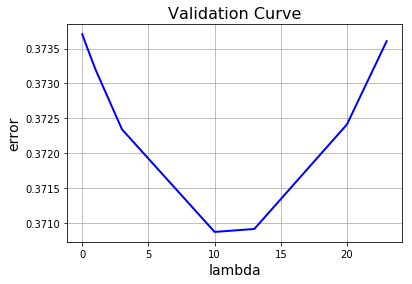

In [66]:

npa = np.asarray(lambda_values, dtype=np.float32)
plt.plot(npa, v, c="b", linewidth=2)
# plt.axis([0, len(lambda_values), 0, val_err[-1] + 1])
plt.grid()
plt.xlabel("lambda", fontsize=14)
plt.ylabel("error", fontsize=14)
plt.title("Validation Curve", fontsize=16)
plt.show()


In [67]:

y_train = Ytrain.to_numpy()[:data_no]
for h in H:
    # Finding Accuracy:
    #  Ratio of no. of correctly predicted samples to total no. of samples.

    # Taking 0.5 as threshold:
    for i in range(0, h.shape[0]):
        if h[i] > 0.5:
            h[i] = 1
        else:
            h[i] = 0
    k = 0
    for i in range(0, h.shape[0]):
        if h[i] == y_train[i]:
            k = k + 1
    accuracy = k/y_train.shape[0]
    print(accuracy)
    

0.863481228668942
0.863481228668942
0.863481228668942
0.863481228668942
0.863481228668942
0.863481228668942
0.863481228668942
0.8600682593856656
0.8600682593856656
0.8600682593856656
0.8600682593856656
0.8600682593856656
0.8600682593856656


Seems as if the change is really insignificant, we will just pick any value.

In [68]:

my_new_list = [i /60 for i in times]
print(my_new_list)


[0.26084379355112713, 0.2575165828069051, 0.2556276122728984, 0.2407589594523112, 0.2561772704124451, 0.2582077383995056, 0.2601521650950114, 0.2666612466176351, 0.2621899485588074, 0.2441572904586792, 0.25321821371714276, 0.24238411982854208, 0.2539312322934469]


### Training the Best Learning Rate

In [69]:

alpha_values = [0, 0.0001, 0.0003, 0.001, 0.005, 0.01, 0.05, .07, .1, .15, .2];
val_err = []
times = []
H = []
data_no = math.floor(Xtrain.shape[0]/100)
it = 5000
lamb = 11
alph = 0.001
for alph in alpha_values:
    start = time.time()
    theta,theta_history,cost = logistic_regression(Xtrain[:data_no,:], Ytrain.to_numpy()[:data_no], alph, it, lamb)
    x_train = np.concatenate((np.ones((Xtrain[:data_no,:].shape[0],1)), Xtrain[:data_no,:]), axis = 1)
    h = hypothesis(theta, x_train, x_train.shape[1] - 1)
    H.append(h)
    val_err.append(cost)
    end = time.time()
    times.append(end - start)
    

In [70]:

v = []
for x in(range(0, len(val_err))):
    v.append(val_err[x][-1])
npa.shape


(13,)

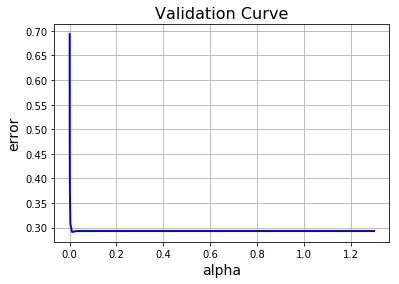

In [71]:

npa = np.asarray(alpha_values, dtype=np.float32)
plt.plot(npa, v, c="b", linewidth=2)
# plt.axis([0, len(lambda_values), 0, val_err[-1] + 1])
plt.grid()
plt.xlabel("alpha", fontsize=14)
plt.ylabel("error", fontsize=14)
plt.title("Validation Curve", fontsize=16)
plt.show()


In [72]:

y_train = Ytrain.to_numpy()[:data_no]
for h in H:
    # Finding Accuracy:
    #  Ratio of no. of correctly predicted samples to total no. of samples.

    # Taking 0.5 as threshold:
    for i in range(0, h.shape[0]):
        if h[i] > 0.5:
            h[i] = 1
        else:
            h[i] = 0
    k = 0
    for i in range(0, h.shape[0]):
        if h[i] == y_train[i]:
            k = k + 1
    accuracy = k/y_train.shape[0]
    print(accuracy)
    

0.7610921501706485
0.7679180887372014
0.8088737201365188
0.8600682593856656
0.8771331058020477
0.8805460750853242
0.8805460750853242
0.8805460750853242
0.8805460750853242
0.8805460750853242
0.8805460750853242


### Running the Algorithm with the chosen Features

In [74]:

# Running the 3-module-Logistic Regression:

# calling the principal function with learning_rate = 0.001 and 
# num_iters = 100000

# print(Ytrain.shape)
# print(Ytrain.to_numpy().shape)
# print(Xtrain.shape)

data_no = Xtrain.shape[0]
it = 50000
lamb = 10
alph = 0.01
import time
start = time.time()

theta,theta_history,cost = logistic_regression(Xtrain[:data_no,:], Ytrain.to_numpy()[:data_no], alph, it, lamb)

end = time.time()
print((end - start))


KeyboardInterrupt: 

In [ ]:

x_train = Xtrain[:,:]
y_train = Ytrain[:]


In [ ]:

print(theta)


In [ ]:

(theta_history.shape)


In [ ]:
# x = np.linspace(0, 10, 100)
fig, ax1 = plt.subplots(figsize=(6, 6))
ax1.set_xticks(np.pi/180. * np.linspace(180,  -180, 8, endpoint=False))
n_iterations = [x for x in range(0,len(theta_history[0]))]
yy = []
for i in range(len(theta_history[0])):
    yy.append(theta_history[i][63])
fig= plt.figure(figsize=(10,10))
# for i in range(len(theta_history[0])):
ax1.scatter(n_iterations, yy,  marker="x", s=40, c='red')
plt.show()

In [ ]:

# The gradual reduction in Cost Function
cost = list(cost)
n_iterations = [x for x in range(1,it+1)]
plt.plot(n_iterations, cost)
plt.xlabel('No. of iterations')
plt.ylabel('Cost')


In [ ]:

x_train = np.concatenate((np.ones((Xtrain[:data_no,:].shape[0],1)), Xtrain[:data_no,:]), axis = 1)
h = hypothesis(theta, x_train, x_train.shape[1] - 1)
# Taking 0.5 as threshold:
for i in range(0, h.shape[0]):
    if h[i] > 0.5:
        h[i] = 1
    else:
        h[i] = 0
        

In [ ]:
y_train = Ytrain.to_numpy()[:data_no]
# Finding Accuracy:
#  Ratio of no. of correctly predicted samples to total no. of samples.
k = 0
for i in range(0, h.shape[0]):
    if h[i] == y_train[i]:
        k = k + 1
accuracy = k/y_train.shape[0]


In [ ]:

accuracy


In [ ]:

# Finding Precision:
# Ratio of no. of correctly predicted positive observations
#     to the total no. of predicted positive observations.
tp = fp = 0
# tp -> True Positive, fp -> False Positive
for i in range(0, h.shape[0]):
    if h[i] == y_train[i] == 0:
        tp = tp + 1
    elif h[i] == 0 and y_train[i] == 1:
        fp = fp + 1
precision = tp/(tp + fp)


In [ ]:

# Finding Recall:
# Proportion of correctly identified positives.

fn = 0
# fn -> False Negatives
for i in range(0, h.shape[0]):
    if h[i] == 1 and y_train[i] == 0:
        fn = fn + 1
recall = tp/(tp + fn)


In [ ]:

recall


In [ ]:

# Finding F1-Score:
#  Harmonic Mean of Precision and Recall
f1_score = (2 * precision * recall)/(precision + recall)


In [ ]:

f1_score


In [ ]:

# Confusion Matrix:
tn = 0
# tn -> True Negative
for i in range(0, h.shape[0]):
    if h[i] == y_train[i] == 1:
        tn = tn + 1

cm = np.array([[tp, fn], [fp, tn]])

# MODULE FOR CONFUSION MATRIX

import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')


In [ ]:

plt.figure()
# Un-Normalized Confusion Matrix...
plot_confusion_matrix(cm, classes=[0,1], normalize=False,
                      title='Unnormalized Confusion Matrix')


In [ ]:

# Normalized Confusion Matrix...
plot_confusion_matrix(cm, classes=[0,1], normalize=True,
                      title='Normalized Confusion Matrix')



### The best parameters are
__Best Penalty: 10__

__Best Alpha is 0.01__


In [ ]:

Xtrain.shape



Best lambda is: 0.03


## Validation

In [ ]:

data_no = Xvalidate.shape[0]
it = 50000
lamb = 0.75
alph = 0.001
import time
start = time.time()

theta,theta_history,cost = logistic_regression(Xvalidate[:data_no,:], Yvalidate.to_numpy()[:data_no], alph, it, lamb)

end = time.time()
print((end - start))


In [ ]:

y_train = Yvalidate.to_numpy()[:data_no]
# Finding Accuracy:
#  Ratio of no. of correctly predicted samples to total no. of samples.
k = 0
for i in range(0, h.shape[0]):
    if h[i] == y_train[i]:
        k = k + 1
accuracy = k/y_train.shape[0]

# Finding Recall:
# Proportion of correctly identified positives.

fn = 0
# fn -> False Negatives
for i in range(0, h.shape[0]):
    if h[i] == 1 and y_train[i] == 0:
        fn = fn + 1
recall = tp/(tp + fn)

# Finding Precision:
# Ratio of no. of correctly predicted positive observations
#     to the total no. of predicted positive observations.
tp = fp = 0
# tp -> True Positive, fp -> False Positive
for i in range(0, h.shape[0]):
    if h[i] == y_train[i] == 0:
        tp = tp + 1
    elif h[i] == 0 and y_train[i] == 1:
        fp = fp + 1
precision = tp/(tp + fp)


# Finding Precision:
# Ratio of no. of correctly predicted positive observations
#     to the total no. of predicted positive observations.
tp = fp = 0
# tp -> True Positive, fp -> False Positive
for i in range(0, h.shape[0]):
    if h[i] == y_train[i] == 0:
        tp = tp + 1
    elif h[i] == 0 and y_train[i] == 1:
        fp = fp + 1
precision = tp/(tp + fp)


# Finding F1-Score:
#  Harmonic Mean of Precision and Recall
f1_score = (2 * precision * recall)/(precision + recall)


In [ ]:

print(accuracy)
print(precision)
print(recall)


In [ ]:

plt.figure()
# Un-Normalized Confusion Matrix...
plot_confusion_matrix(cm, classes=[0,1], normalize=False,
                      title='Unnormalized Confusion Matrix')


In [ ]:

# Normalized Confusion Matrix...
plot_confusion_matrix(cm, classes=[0,1], normalize=True,
                      title='Normalized Confusion Matrix')


## Testing

In [ ]:

data_no = Xtest.shape[0]
it = 50000
lamb = 0.75
alph = 0.001
import time
start = time.time()

theta,theta_history,cost = logistic_regression(Xtest[:data_no,:], Ytest.to_numpy()[:data_no], alph, it, lamb)

end = time.time()
print((end - start))


In [308]:

y_train = Ytest.to_numpy()[:data_no]
# Finding Accuracy:
#  Ratio of no. of correctly predicted samples to total no. of samples.
k = 0
for i in range(0, h.shape[0]):
    if h[i] == y_train[i]:
        k = k + 1
accuracy = k/y_train.shape[0]

# Finding Recall:
# Proportion of correctly identified positives.

fn = 0
# fn -> False Negatives
for i in range(0, h.shape[0]):
    if h[i] == 1 and y_train[i] == 0:
        fn = fn + 1
recall = tp/(tp + fn)

# Finding Precision:
# Ratio of no. of correctly predicted positive observations
#     to the total no. of predicted positive observations.
tp = fp = 0
# tp -> True Positive, fp -> False Positive
for i in range(0, h.shape[0]):
    if h[i] == y_train[i] == 0:
        tp = tp + 1
    elif h[i] == 0 and y_train[i] == 1:
        fp = fp + 1
precision = tp/(tp + fp)


# Finding Precision:
# Ratio of no. of correctly predicted positive observations
#     to the total no. of predicted positive observations.
tp = fp = 0
# tp -> True Positive, fp -> False Positive
for i in range(0, h.shape[0]):
    if h[i] == y_train[i] == 0:
        tp = tp + 1
    elif h[i] == 0 and y_train[i] == 1:
        fp = fp + 1
precision = tp/(tp + fp)


# Finding F1-Score:
#  Harmonic Mean of Precision and Recall
f1_score = (2 * precision * recall)/(precision + recall)


NameError: name 'tp' is not defined

In [ ]:

print(accuracy)
print(precision)
print(recall)


In [ ]:

plt.figure()
# Un-Normalized Confusion Matrix...
plot_confusion_matrix(cm, classes=[0,1], normalize=False,
                      title='Unnormalized Confusion Matrix')


In [ ]:

# Normalized Confusion Matrix...
plot_confusion_matrix(cm, classes=[0,1], normalize=True,
                      title='Normalized Confusion Matrix')


# Refactoring Features

Though the prediction is very good, the time taken is quite intense. A suggested fix is to reduce the amount of features used to compute the model.

Change binary columns to 1, rdeuce all columns by one. Add more divisions to colomns.

In [259]:

train = pd.read_csv(import_source, names = columns , na_values=' ?')
test =  pd.read_csv(import_source_test, names = columns, skiprows=1, na_values=' ?')


In [260]:

train.sample(5)


,Age,Workclass,fnlgwt,Education,Education num,Marital Status,Occupation,Relationship,Race,Sex,Capital Gain,Capital Loss,Hours/Week,Native country,Income
14757,52,Federal-gov,22428,Bachelors,13,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,60,United-States,>50K
10911,47,Private,199058,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,40,United-States,>50K
1757,40,Self-emp-not-inc,34037,HS-grad,9,Never-married,Farming-fishing,Not-in-family,White,Male,0,0,70,United-States,<=50K
17576,33,Local-gov,154874,Some-college,10,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,<=50K
23194,37,State-gov,160910,Doctorate,16,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,45,United-States,<=50K


## Income
__We will change income back to 0 for <= 50K and 1 for > 50K__

In [261]:

train['Income'] = train['Income'].apply(lambda x: 1 if x == ' >50K' else 0)
test['Income'] = test['Income'].apply(lambda x: 1 if x == ' >50K.' else 0)


## Sex


Sex has male and female. These are string that need to be changed to numbers.


In [262]:
train['Sex'] = train['Sex'].apply(lambda x: 1 if x == ' Male' else 0)
test['Sex'] = test['Sex'].apply(lambda x: 1 if x == ' Male' else 0)

If we check column, we can use one input to check, male or not male.

In [263]:
def bin_var(df, var, bins, group_names):
    bin_value = bins
    group = group_names
    df[var+'Bin'] = pd.cut(df[var], bin_value, labels=group)

## Workclass

In [264]:

train.Workclass.isnull().sum()


1836

In [265]:

pd.crosstab(train['Workclass'],train['Income'], margins=True)


Income,0,1,All
Workclass,,,
Federal-gov,589,371,960
Local-gov,1476,617,2093
Never-worked,7,0,7
Private,17733,4963,22696
Self-emp-inc,494,622,1116
Self-emp-not-inc,1817,724,2541
State-gov,945,353,1298
Without-pay,14,0,14
All,23075,7650,30725


In [266]:

train['Workclass'] = train['Workclass'].fillna(' 0')

In [302]:

def workclass(x):
    if re.search('Private', x):
        return 'Private'
    elif re.search('Self', x):
        return 'selfempl'
    elif re.search('gov', x):
        return 'gov'
    else:
        return 'others'
    

In [304]:

train['WorkClassBin']= train.Workclass.replace()
test['WorkClassBin']=test['Workclass'].apply(lambda x: x.strip()).apply(lambda x: workclass(x))


AttributeError: 'Series' object has no attribute 'applymap'

In [ ]:

train = train.drop('Workclass', axis =1)
test = test.drop('Workclass', axis =1)


In [ ]:

pd.crosstab(train['WorkclassBin'],train['Income'], margins=True)


## Relationship

In [305]:

pd.crosstab(train['Relationship'],train['Income'], margins=True)


KeyError: 'Relationship'

In [306]:

def relationship(x):
    if x == 'Husband' or x == 'Wife':
        return 'Married'
    else:
        return 'Single'


In [271]:

train['RelationshipBin'] = train.Relationship.apply(lambda x: x.strip()).apply(lambda x: relationship(x))
test['RelationshipBin'] = test.Relationship.apply(lambda x: x.strip()).apply(lambda x: relationship(x))


In [272]:

train = train.drop('Relationship', axis =1)
test = test.drop('Relationship', axis =1)


In [273]:

pd.crosstab(train['RelationshipBin'],train['Income'], margins=True)


Income,0,1,All
RelationshipBin,,,
Married,8098,6663,14761
Single,16622,1178,17800
All,24720,7841,32561


## Race

In [274]:
pd.crosstab(train['Race'],train['Income'], margins=True)

Income,0,1,All
Race,,,
Amer-Indian-Eskimo,275,36,311
Asian-Pac-Islander,763,276,1039
Black,2737,387,3124
Other,246,25,271
White,20699,7117,27816
All,24720,7841,32561


In [275]:

def race(x):
    if x == 'White':
        return x
    elif x == 'Black':
        return x
    else:
        return ' Other'


In [276]:

train['RaceBin'] = train.Race.apply(lambda x: x.strip()).apply(lambda x: race(x))
test['RaceBin'] = test.Race.apply(lambda x: x.strip()).apply(lambda x: race(x))


In [277]:

train = train.drop('Race', axis =1)
test = test.drop('Race', axis =1)



## Occupation

In [278]:

pd.crosstab(train['Occupation'],train['Income'], margins=True)


Income,0,1,All
Occupation,,,
Adm-clerical,3263,507,3770
Armed-Forces,8,1,9
Craft-repair,3170,929,4099
Exec-managerial,2098,1968,4066
Farming-fishing,879,115,994
Handlers-cleaners,1284,86,1370
Machine-op-inspct,1752,250,2002
Other-service,3158,137,3295
Priv-house-serv,148,1,149


In [279]:

train['Occupation'].replace(np.nan, ' nan', inplace=True)
test['Occupation'].replace(np.nan, ' nan', inplace=True)


In [280]:

def occupation(x):
    if re.search('managerial', x):
        return 'Highskill'
    elif re.search('specialty',x):
        return 'Highskill'
    else:
        return 'Lowskill'

In [281]:

train['OccupationBin'] = train.Occupation.apply(lambda x: x.strip()).apply(lambda x: occupation(x))
test['OccupationBin'] = test.Occupation.apply(lambda x: x.strip()).apply(lambda x: occupation(x))


In [282]:

pd.crosstab(train['OccupationBin'],train['Income'], margins=True)


Income,0,1,All
OccupationBin,,,
Highskill,4379,3827,8206
Lowskill,20341,4014,24355
All,24720,7841,32561


In [283]:

train = train.drop('Occupation', axis =1)
test = test.drop('Occupation', axis =1)


In [284]:

train.sample(5)


,Age,Workclass,fnlgwt,Education,Education num,Marital Status,Sex,Capital Gain,Capital Loss,Hours/Week,Native country,Income,WorkClassBin,RelationshipBin,RaceBin,OccupationBin
25772,63,0,106648,HS-grad,9,Married-civ-spouse,1,0,0,25,United-States,0,others,Married,White,Lowskill
23121,23,Private,105617,9th,5,Never-married,1,0,0,40,United-States,0,Private,Single,White,Lowskill
8332,58,Private,316849,Some-college,10,Divorced,1,0,0,40,United-States,0,Private,Single,White,Lowskill
4719,39,Private,245361,Bachelors,13,Divorced,0,0,0,25,United-States,0,Private,Single,White,Highskill
15315,60,State-gov,165827,Doctorate,16,Married-civ-spouse,1,7688,0,60,United-States,1,gov,Married,White,Highskill


## Education Num

In [285]:

pd.crosstab(train['Education'],train['Income'], margins=True)


Income,0,1,All
Education,,,
10th,871,62,933
11th,1115,60,1175
12th,400,33,433
1st-4th,162,6,168
5th-6th,317,16,333
7th-8th,606,40,646
9th,487,27,514
Assoc-acdm,802,265,1067
Assoc-voc,1021,361,1382


__Education looks to be a great variables deciding income. Lets create categories to further enhance its effect. We will create low, medium and high education.__

Education can be divided into three groups 0-6 low and 7-11 medium and above that high

In [286]:

bin_var(train, 'Education num', [0,6,11,16], ['Low', 'Medium', 'High'])
bin_var(test, 'Education num', [0,6,11,16], ['Low', 'Medium', 'High'])


In [287]:

pd.crosstab(train['Education numBin'],train['Income'] )


Income,0,1
Education numBin,,
Low,2494,151
Medium,17266,3516
High,4960,4174


In [288]:

train = train.drop('Education num', axis =1)
test = test.drop('Education num', axis =1)


We'll drop education since education and education num are related.

In [289]:

train = train.drop('Education', axis =1)
test = test.drop('Education', axis =1)


## Hours/Week

__Number of work hour/week looks to be a great variables deciding income. Lets create categories to further enhance its effect.__

Education can be divided into three groups 0-35 low and 40-60 medium and above that high

In [290]:

bin_var(train, 'Hours/Week', [0,35,40,60,100], ['Low', 'Medium', 'High','VeryHigh'])
bin_var(test, 'Hours/Week', [0,35,40,60,100], ['Low', 'Medium', 'High','VeryHigh'])


In [291]:
pd.crosstab(train['Hours/WeekBin'],train['Income'] )

Income,0,1
Hours/WeekBin,,
Low,6298,582
Medium,12697,3403
High,5019,3452
VeryHigh,706,404


In [292]:

train = train.drop('Hours/Week', axis =1)
test = test.drop('Hours/Week', axis =1)


## Marital Status

In [293]:

pd.crosstab(train['Marital Status'],train['Income'] )


Income,0,1
Marital Status,,
Divorced,3980,463
Married-AF-spouse,13,10
Married-civ-spouse,8284,6692
Married-spouse-absent,384,34
Never-married,10192,491
Separated,959,66
Widowed,908,85


In [294]:

train['Marital StatusBin']=train['Marital Status'].apply(lambda x: ' Married' if x.startswith('Married',1) else ' Single')
test['Marital StatusBin']=test['Marital Status'].apply(lambda x: ' Married' if x.startswith('Married',1) else ' Single')


In [295]:

pd.crosstab(train['Marital StatusBin'],train['Income'] )


Income,0,1
Marital StatusBin,,
Married,8681,6736
Single,16039,1105


In [296]:

train = train.drop('Marital Status', axis =1)
test = test.drop('Marital Status', axis =1)


## Native Country

In [297]:

pd.crosstab(train['Native country'],train['Income'], margins=True)


Income,0,1,All
Native country,,,
Cambodia,12,7,19
Canada,82,39,121
China,55,20,75
Columbia,57,2,59
Cuba,70,25,95
Dominican-Republic,68,2,70
Ecuador,24,4,28
El-Salvador,97,9,106
England,60,30,90


In [298]:
train['Native countryBin']=train['Native country'].apply(lambda x: ' United-States' if x == ' United-States' else ' Other')
test['Native countryBin']=test['Native country'].apply(lambda x: ' United-States' if x == ' United-States' else ' Other')

In [299]:

pd.crosstab(train['Native countryBin'],train['Income'], margins=True)


Income,0,1,All
Native countryBin,,,
Other,2721,670,3391
United-States,21999,7171,29170
All,24720,7841,32561


In [300]:

train = train.drop('Native country', axis =1)
test = test.drop('Native country', axis =1)


In [307]:

train.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
Age                  32561 non-null int64
Workclass            32561 non-null object
fnlgwt               32561 non-null int64
Sex                  32561 non-null int64
Capital Gain         32561 non-null int64
Capital Loss         32561 non-null int64
Income               32561 non-null int64
WorkClassBin         32561 non-null object
RelationshipBin      32561 non-null object
RaceBin              32561 non-null object
OccupationBin        32561 non-null object
Education numBin     32561 non-null category
Hours/WeekBin        32561 non-null category
Marital StatusBin    32561 non-null object
Native countryBin    32561 non-null object
dtypes: category(2), int64(6), object(7)
memory usage: 3.3+ MB
